In [2]:
!pip install geodatasets cartopy geopandas

import geopandas
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from geodatasets import get_path

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   ---- ----------------------------------- 2.4/19.2 MB 11.8 MB/s eta 0:00:02
   --------- ------------------------------ 4.7/19.2 MB 11.7 MB/s eta 0:00:02
   --------------- ------------------------ 7.3/19.2 MB 11.6 MB/s eta 0:00:02
   -------------------- ------------------- 9.7/19.2 MB 11.6 MB/s eta 0:00:01
   ------------------------- -------------- 12.1/19.2 MB 11.7 MB/s eta 0:00:01
   ------------------------------ --------- 14.4/19.2 MB 11.7 MB/s eta 0:00:01
   ----------------------------------- ---- 16.8/19.2 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------  19.1/19.2 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------- 19.2/19.2 MB 11.1 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [pyogrio]
   ---------------------------------------- 0/2 [pyogrio]
   -------------------------

<Axes: >

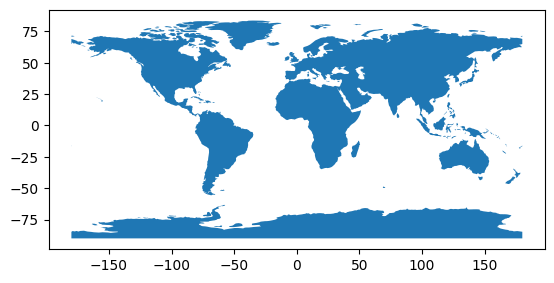

In [3]:
path = get_path("naturalearth.land")
world = geopandas.read_file(path)
world.plot()

<GeoAxes: title={'center': 'EPSG:3857'}>

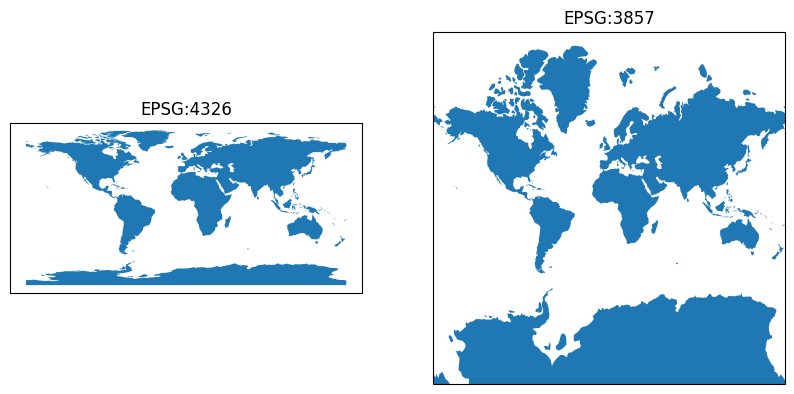

In [4]:
# EPSG:4326 - WGS 84
crs = ccrs.epsg("3857")

# EPSG:3857 - Web Mercator
world_epsg = world.to_crs(epsg="3857")

fig, axs = plt.subplots(1, 2, subplot_kw={"projection": crs}, figsize=(10, 5))
axs[0].set(title='EPSG:4326')
axs[1].set(title='EPSG:3857')
world.plot(ax=axs[0])
world_epsg.plot(ax=axs[1])

In [5]:
# Mapping
# Obtaining data and then projecting it onto a map

import pandas as pd
df = pd.read_csv('https://firms.modaps.eosdis.nasa.gov/content/notebooks/sample_viirs_snpp_071223.csv')

# show top 5 records
df.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,0.05836,29.59085,295.64,0.38,0.59,2023-07-12,3,N,VIIRS,n,2.0NRT,275.15,0.83,N
1,0.48765,31.50760,296.73,0.51,0.66,2023-07-12,3,N,VIIRS,n,2.0NRT,275.15,0.56,N
2,2.15227,13.94524,305.26,0.51,0.49,2023-07-12,3,N,VIIRS,n,2.0NRT,287.94,1.08,N
3,2.15681,13.94618,319.05,0.51,0.49,2023-07-12,3,N,VIIRS,n,2.0NRT,288.77,1.81,N
4,2.15754,13.94131,301.13,0.51,0.50,2023-07-12,3,N,VIIRS,n,2.0NRT,288.17,1.81,N


In [6]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
)

# show top 3 records
gdf.head(3)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,geometry
0,0.05836,29.59085,295.64,0.38,0.59,2023-07-12,3,N,VIIRS,n,2.0NRT,275.15,0.83,N,POINT (29.59085 0.05836)
1,0.48765,31.50760,296.73,0.51,0.66,2023-07-12,3,N,VIIRS,n,2.0NRT,275.15,0.56,N,POINT (31.5076 0.48765)
2,2.15227,13.94524,305.26,0.51,0.49,2023-07-12,3,N,VIIRS,n,2.0NRT,287.94,1.08,N,POINT (13.94524 2.15227)


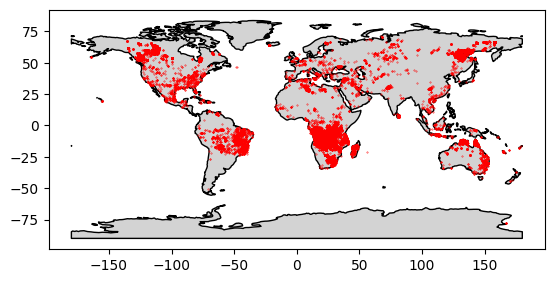

In [7]:
ax = world.plot(color="lightgrey", edgecolor="black")

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color="red", markersize=0.1)

plt.show()

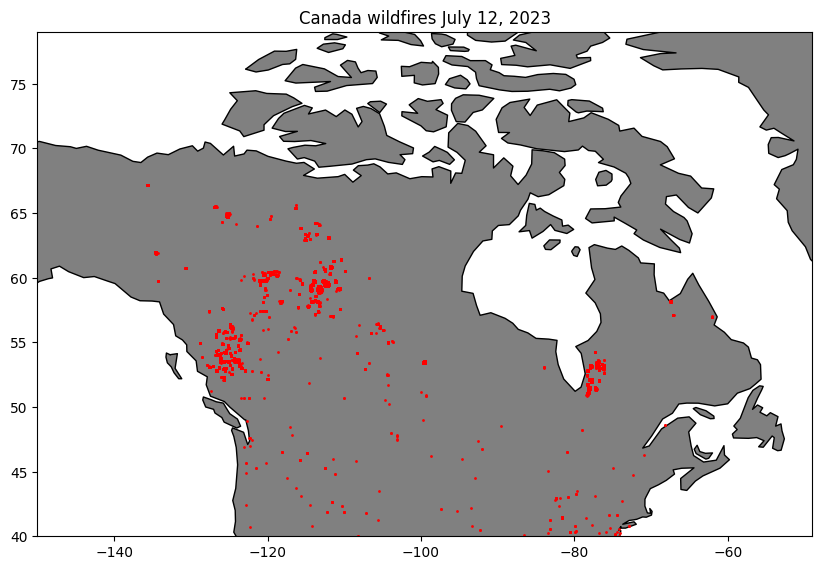

In [8]:
df_canada = df[(df['longitude'] >= -150) & (df['latitude'] >= 40) & (df['longitude'] <= -49) & (df['latitude'] <= 79)].copy()

# create geometry for points using latitude and longitude and specifying projection as EPSG:4326

gdf = geopandas.GeoDataFrame(
    df_canada, geometry=geopandas.points_from_xy(df_canada.longitude, df_canada.latitude), crs="EPSG:4326"
)

# set our extent
extent = [-150, 40, -49, 79]
ax = world.plot(figsize=(10, 10), color="grey", edgecolor="black")
ax.set_xlim([extent[0],  extent[2]])
ax.set_ylim([extent[1],  extent[3]])

ax.set(title='Canada wildfires July 12, 2023')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color="red", markersize=1)

plt.show()

In [10]:
"""
Time Since Detection
- dark red; detections <= 1 hour
- red; detections > 1 hour but less than or equal to 4 hours
- orange; detections > 4hours and less than or equal to 12 hours
- yellow; detections older than 12 hours
"""

'\nTime Since Detection\n- dark red; detections <= 1 hour\n- red; detections > 1 hour but less than or equal to 4 hours\n- orange; detections > 4hours and less than or equal to 12 hours\n- yellow; detections older than 12 hours\n'

In [11]:
df_canada['acq_datetime'] = pd.to_datetime(df_canada['acq_date'] + ' ' + df_canada['acq_time'].astype(str).str.zfill(4), format='%Y-%m-%d %H%M')
gdf = geopandas.GeoDataFrame(
    df_canada, geometry=geopandas.points_from_xy(df_canada.longitude, df_canada.latitude), crs="EPSG:4326"
)
# find maximum time from our dataset since we are pretending current date time is July 12 2023, 19:50(7:50pm) GMT.
# if the data were recent, we would set dt_max = pd.Timestamp.now();
dt_max = gdf['acq_datetime'].max()

# create our subsets for 4 color classes

# less than or equal to 1 hour; gdf1 <= 1hour
gdf1 = gdf[gdf['acq_datetime'] >= (dt_max - pd.Timedelta(hours=1))]

# greater than 1 hour but less than or equal to 4 hours; gdf2 > 1 hour and gdf2 <= 4 hours
gdf2 = gdf[(gdf['acq_datetime'] >= (dt_max - pd.Timedelta(hours=4))) & (gdf['acq_datetime'] < (dt_max - pd.Timedelta(hours=1)))]

# greater than 4 hours but less than or equal to 12 hours; gdf3 > 4 hours and gdf2 <= 12 hours
gdf3 = gdf[(gdf['acq_datetime'] >= (dt_max - pd.Timedelta(hours=12))) & (gdf['acq_datetime'] < (dt_max - pd.Timedelta(hours=4)))]

# greater than 12 hours; gdf4 > 12 hours
gdf4 = gdf[gdf['acq_datetime'] < (dt_max - pd.Timedelta(hours=12))]

# now let's make sure the sizes are correct. They should all add up to 14045
print ('Sizes %i, %i, %i, %i from total of %i' % (gdf1.count()[0],gdf2.count()[0],gdf3.count()[0],gdf4.count()[0], gdf.count()[0]))

Sizes 3792, 913, 8449, 891 from total of 14045


C:\Users\angel\AppData\Local\Temp\ipykernel_36392\2283213018.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print ('Sizes %i, %i, %i, %i from total of %i' % (gdf1.count()[0],gdf2.count()[0],gdf3.count()[0],gdf4.count()[0], gdf.count()[0]))
C:\Users\angel\AppData\Local\Temp\ipykernel_36392\2283213018.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print ('Sizes %i, %i, %i, %i from total of %i' % (gdf1.count()[0],gdf2.count()[0],gdf3.count()[0],gdf4.count()[0], gdf.count()[0]))
C:\Users\angel\AppData\Local\Temp\ipykernel_36392\2283213018.py:24: FutureWarning: Series.__getitem__ treating keys as positions is 

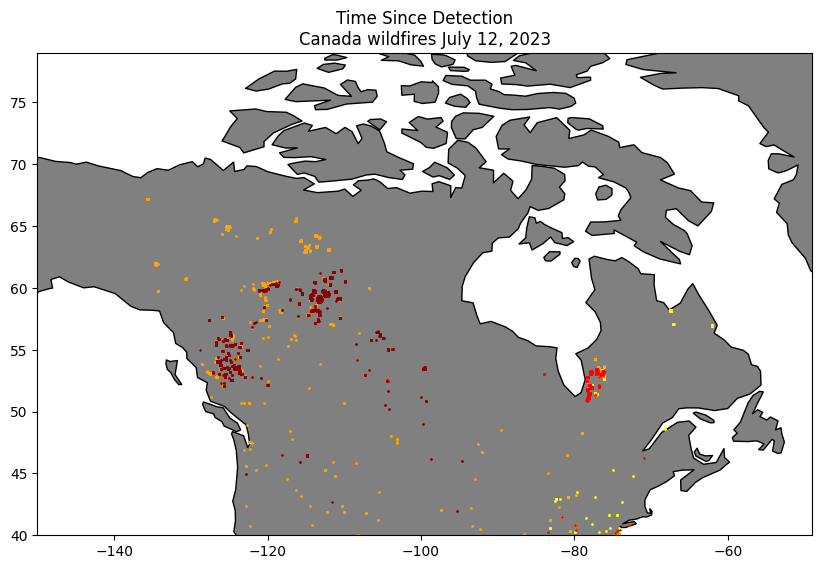

In [12]:
extent = [-150, 40, -49, 79]
ax = world.plot(figsize=(10, 10), color="grey", edgecolor="black")

# set map extent
ax.set_xlim([extent[0],  extent[2]])
ax.set_ylim([extent[1],  extent[3]])

# add graph title
ax.set(title='Time Since Detection\nCanada wildfires July 12, 2023')

# Color code each set; also we are drawing in opposite order, so the older detections are drawn first so the newer ones are on the top
gdf4.plot(ax=ax, color="yellow", markersize=1)
gdf3.plot(ax=ax, color="orange", markersize=1)
gdf2.plot(ax=ax, color="red", markersize=1)
gdf1.plot(ax=ax, color="darkred", markersize=1)

plt.show()

In [13]:
!pip install contextily
import contextily as cx

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
   --- ------------------------------------ 2.4/25.4 MB 11.6 MB/s eta 0:00:02
   ------- -------------------------------- 4.7/25.4 MB 11.2 MB/s eta 0:00:02
   ----------- ---------------------------- 7.1/25.4 MB 11.2 MB/s eta 0:00:02
   -------------- ------------------------- 9.4/25.4 MB 11.3 MB/s eta 0:00:02
   ----------------- ---------------------- 11.3/25.4 MB 10.9 MB/s eta 0:00:02
   --------------------- ------------------ 13.6/25.4 MB 11.1 MB/s eta 0:00:02
   ------------------------ --------------- 15.7/25.4 MB 11.2 MB/s eta 0:00:01
   ---------------------------- ----------- 17.8/25.4 MB 11.1 MB/s eta 0:00:01
   -------------------------------- ------- 20.4/25.4 MB 11.1 MB/s eta 0:00:01
   ----------------------------------- ---- 22.8/25.4 MB 11.1 MB/s eta 0:00:01
   ---------------------------------------  25.2/25.4 MB 11.1 MB/s

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


C:\Users\angel\AppData\Local\Temp\ipykernel_36392\1847626264.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if gdf4.count()[0] > 0 :
C:\Users\angel\AppData\Local\Temp\ipykernel_36392\1847626264.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if gdf3.count()[0] > 0 :
C:\Users\angel\AppData\Local\Temp\ipykernel_36392\1847626264.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if gdf2.count()[0] > 0 :
C:\Users\angel\AppD

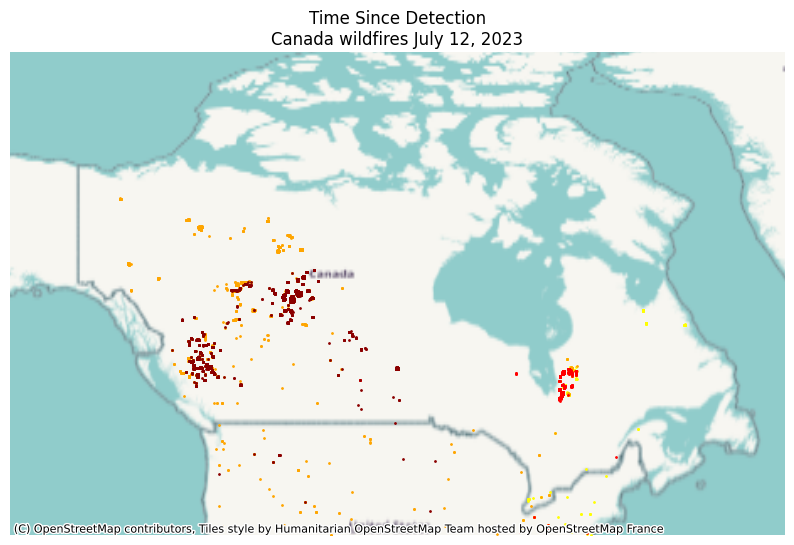

In [14]:
extent = [-150, 40, -49, 79]
ax = world.plot(figsize=(10, 10), alpha=0)

# set our map extent
ax.set_xlim([extent[0],  extent[2]])
ax.set_ylim([extent[1],  extent[3]])

# set title
ax.set(title='Time Since Detection\nCanada wildfires July 12, 2023')
# turn off axis labels
ax.set_axis_off()

# Color code each set; also we are drawing in opposite order, so the older detections are drawn first so the newer ones are on the top
if gdf4.count()[0] > 0 :
  gdf4.plot(ax=ax, color="yellow", markersize=1)
if gdf3.count()[0] > 0 :
  gdf3.plot(ax=ax, color="orange", markersize=1)
if gdf2.count()[0] > 0 :
  gdf2.plot(ax=ax, color="red", markersize=1)
if gdf1.count()[0] > 0 :
  gdf1.plot(ax=ax, color="darkred", markersize=1)

# add basemap
cx.add_basemap(ax, crs=gdf1.crs)

# show our map plot
plt.show()